In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(len(df))

1470


In [ ]:
num_rows=df.shape[0]
num_cols=df.shape[1]
print(f"Number of rows:{num_rows}")
print(f"Number of columns:{num_cols}")


Number of rows:1470
Number of columns:35


In [ ]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
missing_values=df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Initialse the total no. of employees , attrition count and overall_attrition_rate**



In [ ]:
total_employees = len(df)
attrition_count = len(df[df['Attrition'] == 'Yes'])
overall_attrition_rate = (attrition_count / total_employees) * 100

PRINT TOTAL NO. OF EMPLOYEES ,EMPLOYEES LEFT AND OVERALL ATTRITION RATE

In [ ]:
print(f"Total Employees: {total_employees:}")
print(f"Employees Left: {attrition_count:}")
print(f"Employees Retained: {total_employees - attrition_count:}")
print(f"Overall Attrition Rate: {overall_attrition_rate:.2f}%")


Total Employees: 1470
Employees Left: 237
Employees Retained: 1233
Overall Attrition Rate: 16.12%


ATTRITION BASED ON AGE ANALYSIS

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'],  bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
print(df['AgeGroup'])

0       36-45
1       46-55
2       36-45
3       26-35
4       26-35
        ...  
1465    36-45
1466    36-45
1467    26-35
1468    46-55
1469    26-35
Name: AgeGroup, Length: 1470, dtype: category
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '55+']


In [ ]:
age_analysis = df.groupby('AgeGroup').agg({ 'Attrition': ['count',
                lambda x: sum(x == 'Yes'),  # Number who left
                lambda x: (sum(x == 'Yes') / len(x)) * 100  ] })
age_analysis.columns = ['Total_Employees', 'Left', 'Attrition_Rate_%']
age_analysis = age_analysis.round(1)
print(age_analysis)

          Total_Employees  Left  Attrition_Rate_%
AgeGroup                                         
18-25                 123    44              35.8
26-35                 606   116              19.1
36-45                 468    43               9.2
46-55                 226    26              11.5
55+                    47     8              17.0


ATTRITION BASED ON GENDER ANALYSIS

In [ ]:
gender_analysis = df.groupby('Gender').agg({'Attrition': ['count',
                lambda x: sum(x == 'Yes'),
                lambda x: (sum(x == 'Yes') / len(x)) * 100]})
gender_analysis.columns = ['Total_Employees', 'Left', 'Attrition_Rate_%']
gender_analysis = gender_analysis.round(1)
print(gender_analysis)

        Total_Employees  Left  Attrition_Rate_%
Gender                                         
Female              588    87              14.8
Male                882   150              17.0


ATTRITION BASED ON EDUCATION

In [ ]:
education_map = {1: 'Below_College', 2: 'College', 3: 'Bachelor',  4: 'Master', 5: 'Doctor'}
df['Education_Level'] = df['Education'].map(education_map)
edu_analysis = df.groupby('Education_Level').agg({'Attrition': [ 'count',
                lambda x: sum(x == 'Yes'),
                lambda x: (sum(x == 'Yes') / len(x)) * 100 ]})
edu_analysis.columns = ['Total_Employees', 'Left', 'Attrition_Rate_%']
edu_analysis = edu_analysis.round(1).sort_values('Attrition_Rate_%', ascending=False)
print(edu_analysis)

                 Total_Employees  Left  Attrition_Rate_%
Education_Level                                         
Below_College                170    31              18.2
Bachelor                     572    99              17.3
College                      282    44              15.6
Master                       398    58              14.6
Doctor                        48     5              10.4


ATTRITION BASED ON DEPARTMENT

In [ ]:
dept_analysis = df.groupby('Department').agg({ 'Attrition': ['count',lambda x: sum(x == 'Yes'),
                                                         lambda x: (sum(x == 'Yes') / len(x)) * 100    ]})
dept_analysis.columns = ['Total_Employees', 'Left', 'Attrition_Rate_%']
dept_analysis = dept_analysis.round(1).sort_values('Attrition_Rate_%', ascending=False)
print(dept_analysis)

                        Total_Employees  Left  Attrition_Rate_%
Department                                                     
Sales                               446    92              20.6
Human Resources                      63    12              19.0
Research & Development              961   133              13.8


**VISUALISATION**

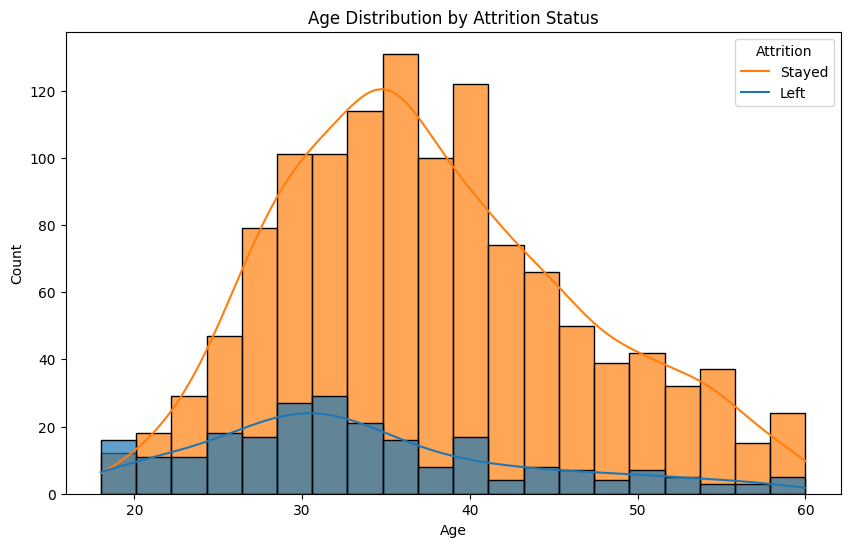

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, kde=True, alpha=0.7)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Stayed', 'Left'], title='Attrition')
plt.show()

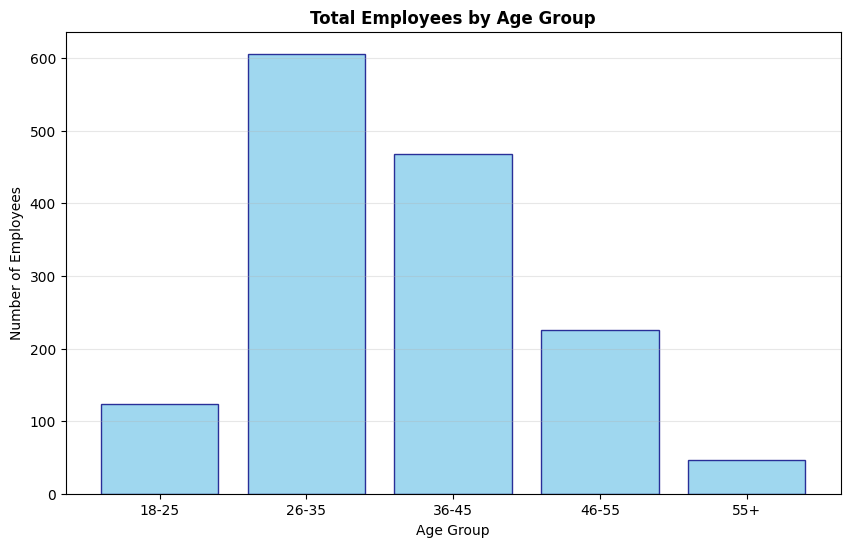

In [ ]:
# CONVERTED CODE (using plt):
plt.figure(figsize=(10, 6))
bars1 = plt.bar(age_analysis.index, age_analysis['Total_Employees'],
                color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1)
plt.title('Total Employees by Age Group', fontsize=12, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.3)

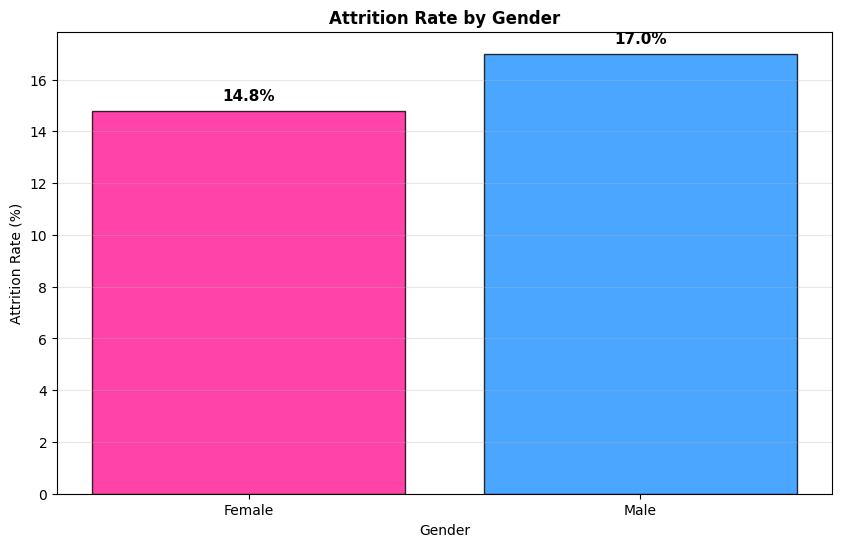

In [ ]:
plt.figure(figsize=(10, 6))
bars2 = plt.bar(gender_analysis.index, gender_analysis['Attrition_Rate_%'],
                color=['#FF1493', '#1E90FF'], alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Attrition Rate by Gender', fontsize=12, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars2, gender_analysis['Attrition_Rate_%']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3, f'{value}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

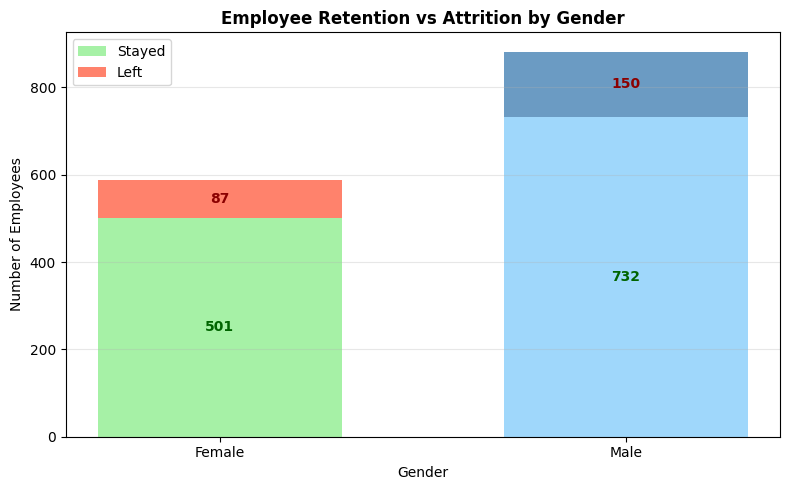

In [ ]:
plt.figure(figsize=(8,5))
stayed = gender_analysis['Total_Employees'] - gender_analysis['Left']
width = 0.6

bars_stayed = plt.bar(gender_analysis.index, stayed, width,
                     label='Stayed', color=['#90EE90', '#87CEFA'], alpha=0.8)  # Light green/blue
bars_left = plt.bar(gender_analysis.index, gender_analysis['Left'], width,
                   bottom=stayed, label='Left', color=['#FF6347', '#4682B4'], alpha=0.8)  # Red/dark blue

plt.title('Employee Retention vs Attrition by Gender', fontsize=12, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend()
plt.grid(axis='y', alpha=0.3)


for i, gender in enumerate(gender_analysis.index):
    total = gender_analysis.loc[gender, 'Total_Employees']
    left = gender_analysis.loc[gender, 'Left']
    stayed_count = stayed.iloc[i]

    # Label for stayed count
    plt.text(i, stayed_count/2, f'{int(stayed_count)}',
             ha='center', va='center', fontweight='bold', color='darkgreen', fontsize=10)

    # Label for left count
    plt.text(i, stayed_count + left/2, f'{int(left)}',
             ha='center', va='center', fontweight='bold', color='darkred', fontsize=10)

plt.tight_layout()
plt.show()

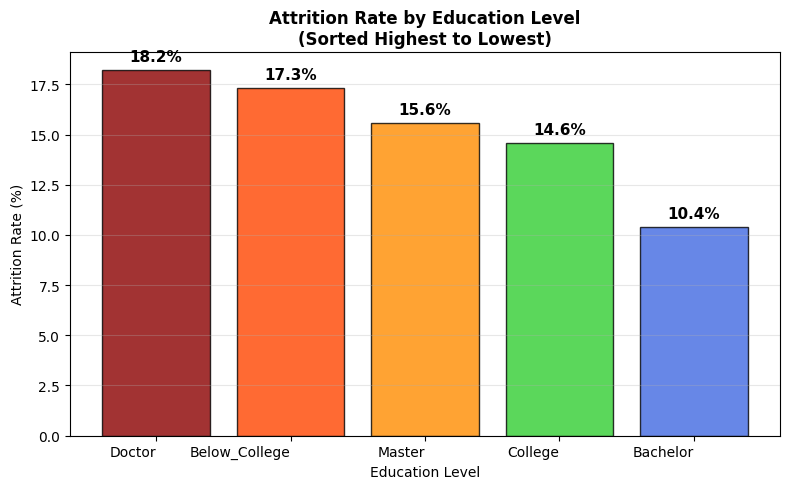

In [ ]:
education_levels = ['Doctor', 'Below_College', 'Master', 'College', 'Bachelor']  # Sorted by attrition rate (descending)
edu_analysis = pd.DataFrame({
    'Total_Employees': [170,572, 282, 398, 48],
    'Left': [31,99,44,58,5],
    'Attrition_Rate_%': [18.2, 17.3,  15.6, 14.6,10.4,]}, index=education_levels)
edu_analysis.index.name = 'Education_Level'


# Define education-based color palette (from highest to lowest education)
colors = ['#8B0000', '#FF4500', '#FF8C00', '#32CD32','#4169E1']  # Dark red to blue gradient

# 1. Bar Chart - Attrition Rate by Education Level (sorted)
plt.figure(figsize=(8,5))
bars1 = plt.bar(range(len(edu_analysis)), edu_analysis['Attrition_Rate_%'],
                color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Attrition Rate by Education Level\n(Sorted Highest to Lowest)', fontsize=12, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(range(len(edu_analysis)), edu_analysis.index,  ha='right')
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars1, edu_analysis['Attrition_Rate_%']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3, f'{value}%', ha='center', va='bottom', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

Sorted departments: ['Sales', 'Research & Development', 'Human Resources']


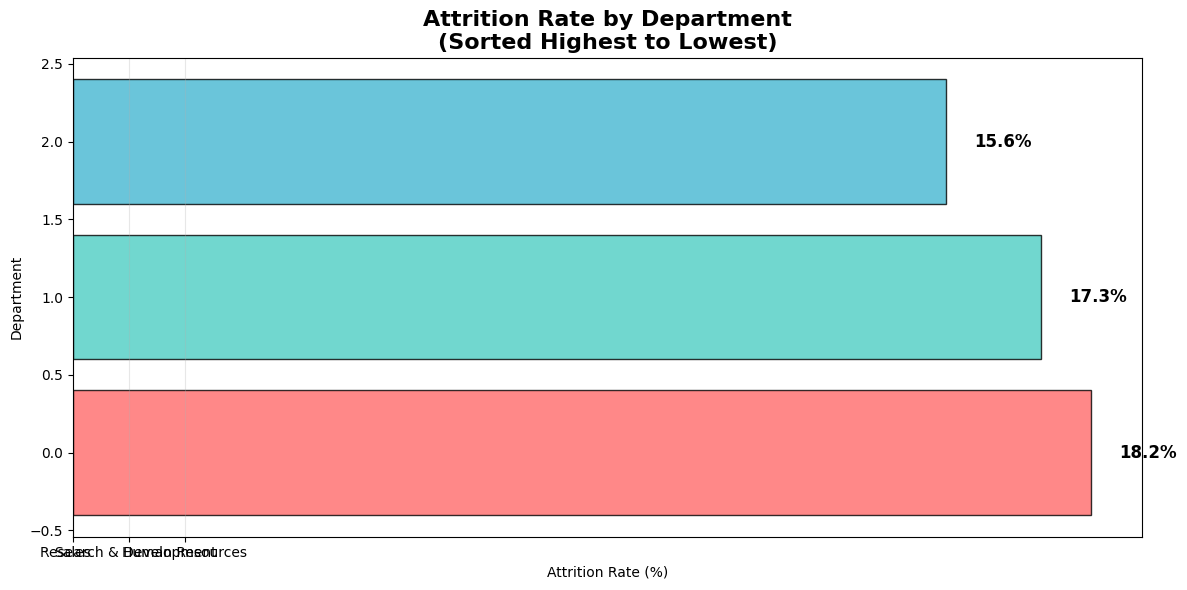

In [ ]:
departments = ['Sales', 'Research & Development', 'Human Resources']

# FIXED: Use departments as index (3 items) to match data length (3 items each)
dept_analysis = pd.DataFrame({
    'Total_Employees': [170, 572, 282],
    'Left': [31, 99, 44],
    'Attrition_Rate_%': [18.2, 17.3, 15.6]
}, index=departments)  # Use departments, NOT education_levels

dept_labels = list(dept_analysis.index)
print(f"Sorted departments: {dept_labels}")

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Sort by attrition rate (descending) for better visualization
dept_analysis = dept_analysis.sort_values('Attrition_Rate_%', ascending=False)
dept_analysis.index.name = 'Department'
plt.figure(figsize=(12, 6))
y_pos = range(len(dept_analysis))

bars1 = plt.barh(y_pos, dept_analysis['Attrition_Rate_%'].values,
                 color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Attrition Rate by Department\n(Sorted Highest to Lowest)', fontsize=16, fontweight='bold')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')
plt.xticks(y_pos, dept_labels)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, dept_analysis['Attrition_Rate_%'].values):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{value}%', ha='left', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

Sorted departments: ['Sales', 'Research & Development', 'Human Resources']


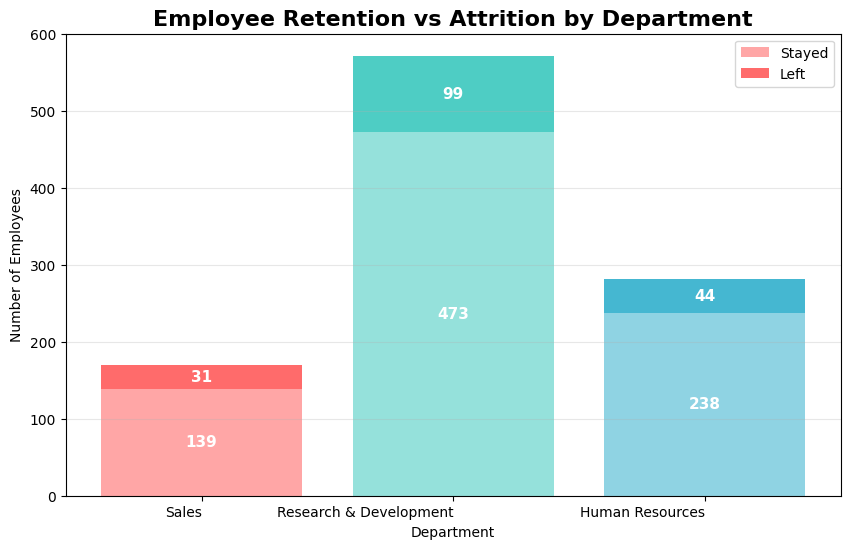

In [ ]:
plt.figure(figsize=(10, 6))
stayed = dept_analysis['Total_Employees'] - dept_analysis['Left']

bars_stayed = plt.bar(range(len(dept_analysis)), stayed.values,
                     label='Stayed', color=colors, alpha=0.6)
bars_left = plt.bar(range(len(dept_analysis)), dept_analysis['Left'].values,
                   bottom=stayed.values, label='Left', color=colors, alpha=1.0)
dept_labels = list(dept_analysis.index)
print(f"Sorted departments: {dept_labels}")

plt.title('Employee Retention vs Attrition by Department', fontsize=16, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(range(len(dept_analysis)), dept_labels,  ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add count labels on stacked bars
for i, dept in enumerate(dept_labels):
    total = dept_analysis.iloc[i]['Total_Employees']
    left = dept_analysis.iloc[i]['Left']
    stayed_count = stayed.iloc[i]

    # Label for stayed count
    plt.text(i, stayed_count/2, f'{int(stayed_count)}',
             ha='center', va='center', fontweight='bold', color='white', fontsize=11)

    # Label for left count
    plt.text(i, stayed_count + left/2, f'{int(left)}',
             ha='center', va='center', fontweight='bold', color='white', fontsize=11)


plt.show()




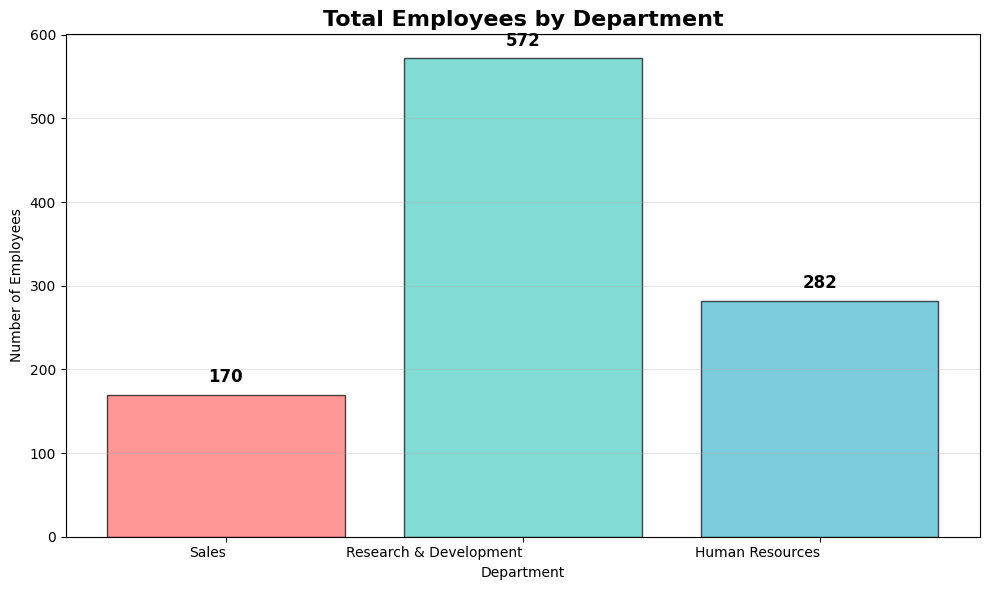

In [ ]:
plt.figure(figsize=(10, 6))
bars2 = plt.bar(range(len(dept_analysis)), dept_analysis['Total_Employees'].values,
                color=colors, alpha=0.7, edgecolor='black', linewidth=1)
plt.title('Total Employees by Department', fontsize=16, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(range(len(dept_analysis)), dept_labels,  ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, dept_analysis['Total_Employees'].values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(value)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

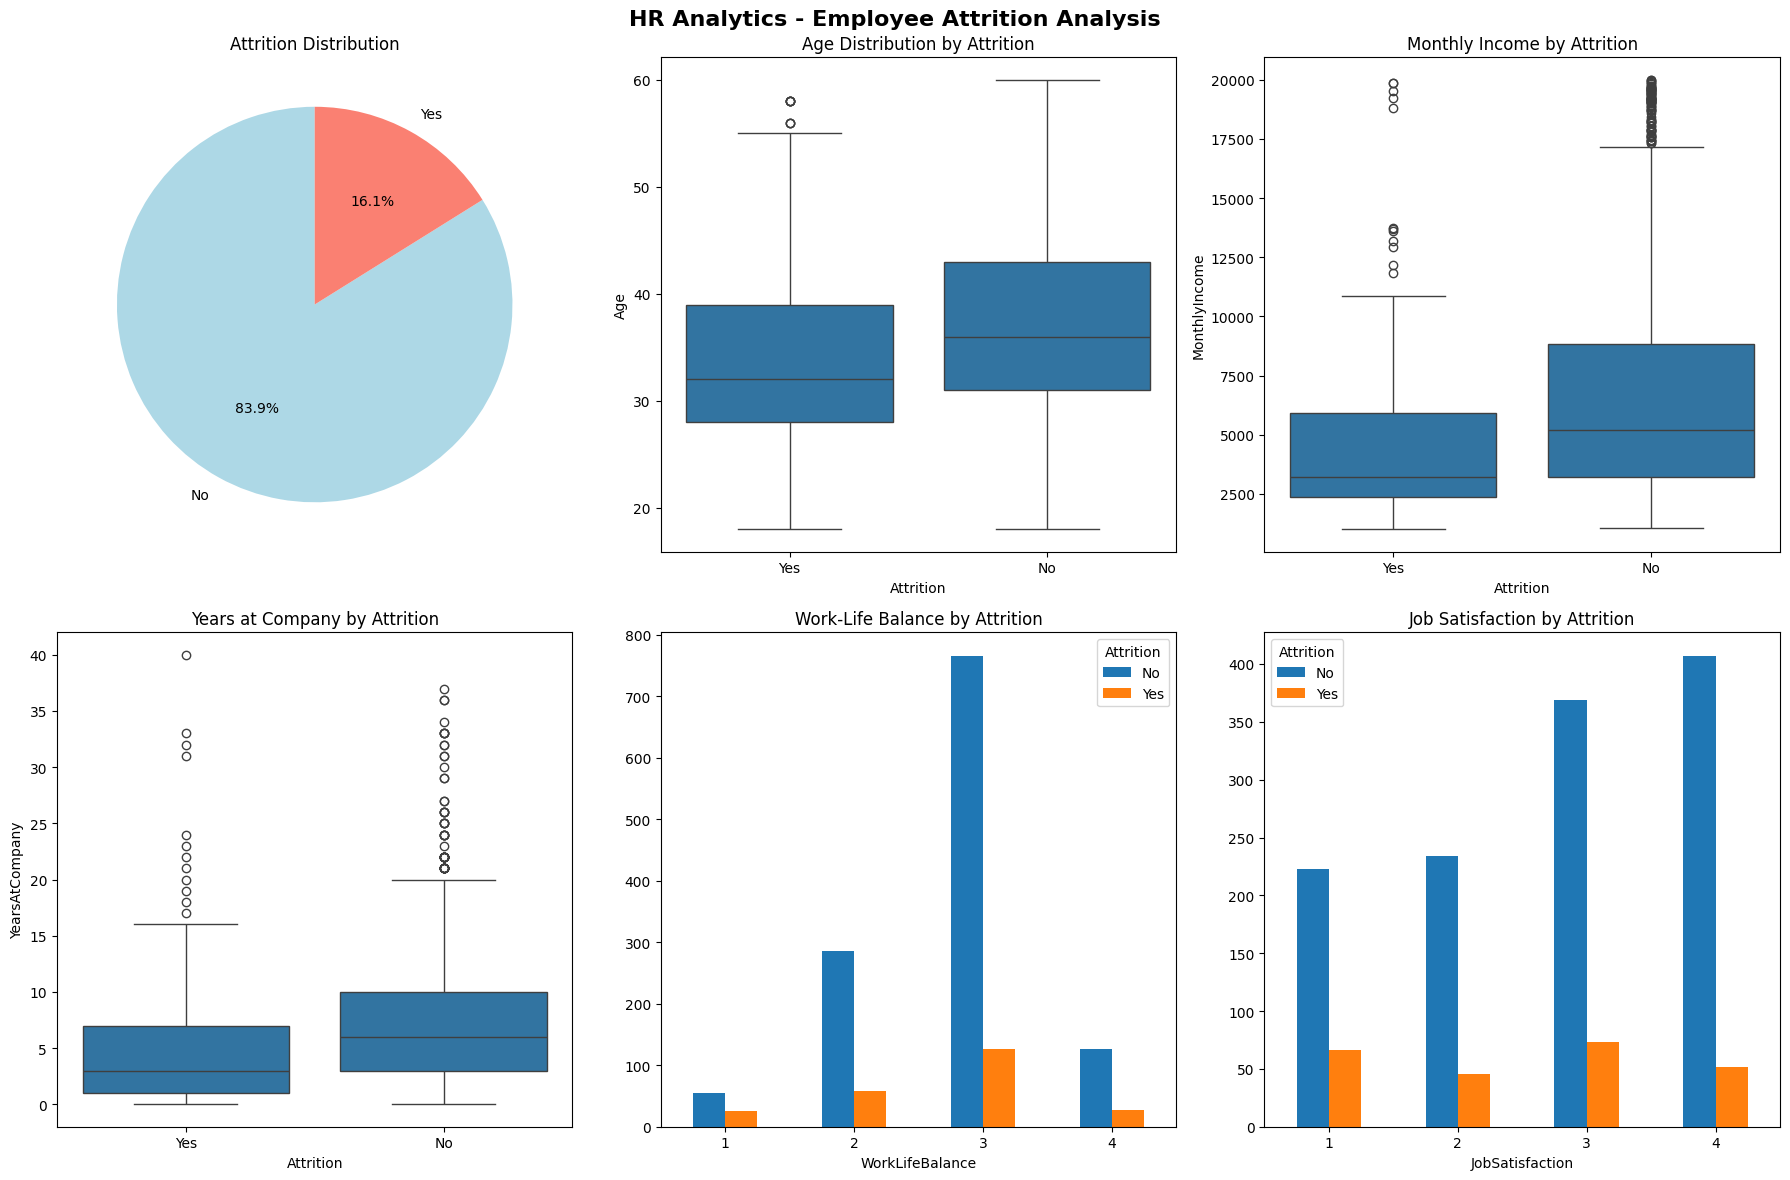

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('HR Analytics - Employee Attrition Analysis', fontsize=16, fontweight='bold')

    # 1. Attrition Distribution (FIXED)
attrition_counts = df['Attrition'].value_counts()
axes[0,0].pie(attrition_counts.values,
                  labels=attrition_counts.index,
                  autopct='%1.1f%%',
                  startangle=90,
                  colors=['lightblue', 'salmon'])
axes[0,0].set_title('Attrition Distribution')

    # 2. Age Distribution by Attrition
sns.boxplot(data=df, x='Attrition', y='Age', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Attrition')

    # 3. Monthly Income by Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0,2])
axes[0,2].set_title('Monthly Income by Attrition')

    # 4. Years at Company by Attrition
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', ax=axes[1,0])
axes[1,0].set_title('Years at Company by Attrition')

    # 5. Work-Life Balance by Attrition
pd.crosstab(df['WorkLifeBalance'], df['Attrition']).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Work-Life Balance by Attrition')
axes[1,1].legend(title='Attrition')
axes[1,1].tick_params(axis='x', rotation=0)

    # 6. Job Satisfaction by Attrition
pd.crosstab(df['JobSatisfaction'], df['Attrition']).plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Job Satisfaction by Attrition')
axes[1,2].legend(title='Attrition')
axes[1,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()